In [106]:
import tweepy
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math


Set our Twitter tokens

In [93]:
# The API-Key and the API-secret were displayed to you after you registered
API_KEY = 'CMVbbKW3qlYrNjeol8nE7qyk4'
API_SECRET = 'JmiBkatpuUA9I92ZKznin69Y9elODwTqCqyTTMPMFfTj6CrDs1'
ACCESS_TOKEN = '1413630811656622088-lHsFvx5qbW2xFiubSH41dPuGZ2IVbO'
ACCESS_SECRET = 'AivMHCufTSkJwqjKu66SFwigVQ0vYumzrACu9cFu7FcFE'

In [94]:
# Setup the authentication with your Twitter credentials:
auth = tweepy.OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
# Create the api to connect to Twitter using your authentication 
api = tweepy.API(auth, wait_on_rate_limit=True)

Get the top x tweets

In [96]:
max_tweets = 500
query = "(#trump)-filter:retweets"
nl_searcher = list(tweepy.Cursor(api.search_tweets, q=query, lang="nl").items(max_tweets))
en_searcher = list(tweepy.Cursor(api.search_tweets, q=query, lang="en").items(max_tweets))

Rate limit reached. Sleeping for: 64


Go over all data points in the tweet Cursor and load them into a dictionary

In [97]:
len(en_searcher), len(nl_searcher)

(500, 500)

In [98]:
nlData = {"id": [], "created_at":[], "text": [], 'source': [], 'userID':[], 'name':[], 'username': [], 'location': [], 'userDescription': []}
enData = {"id": [], "created_at":[], "text": [], 'source': [], 'userID':[], 'name':[], 'username': [], 'location': [], 'userDescription': []}
for nl, en in zip(nl_searcher, en_searcher):
    # Set the dutch tweet data
    nlData['id'].append(nl.id)
    nlData['created_at'].append(nl.created_at)
    nlData['text'].append(nl.text)
    nlData['source'].append(nl.source)
    nlData['userID'].append(nl.user.id)
    nlData['name'].append(nl.user.name)
    nlData['username'].append(nl.user.screen_name)
    nlData['location'].append(nl.user.location)
    nlData['userDescription'].append(nl.user.description)
    # Set the pt tweet data
    enData['id'].append(en.id)
    enData['created_at'].append(en.created_at)
    enData['text'].append(en.text)
    enData['source'].append(en.source)
    enData['userID'].append(en.user.id)
    enData['name'].append(en.user.name)
    enData['username'].append(en.user.screen_name)
    enData['location'].append(en.user.location)
    enData['userDescription'].append(en.user.description)

Convert the data to dataframes and write them to .csv files. Once you have the data dont reaload the cells. Just run the ones after to load the .csv

In [99]:
nlDF = pd.DataFrame.from_dict(nlData)
enDF = pd.DataFrame.from_dict(enData)
nlDF.to_csv("./dutchDataset.csv")
enDF.to_csv("./englishDataset.csv")

Load the data

In [101]:
nlDF = pd.read_csv("./dutchDataset.csv")
enDF = pd.read_csv("./englishDataset.csv")

Lets see what the data keys actually are

In [102]:
nlDF.columns, enDF.columns

(Index(['Unnamed: 0', 'id', 'created_at', 'text', 'source', 'userID', 'name',
        'username', 'location', 'userDescription'],
       dtype='object'),
 Index(['Unnamed: 0', 'id', 'created_at', 'text', 'source', 'userID', 'name',
        'username', 'location', 'userDescription'],
       dtype='object'))

now lets create two distributions based on the length of each tweets and compare the difference, here I still need to add the title and legend properly. Still, we can see that the data of Dutch and English speakers is very similar according to the topic on Twitter.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


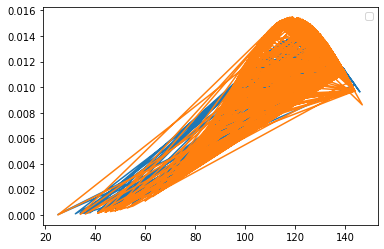

In [112]:
nlLengths = [len(x) for x in nlDF["text"]]
enLengths = [len(x) for x in enDF["text"]]
plt.plot(nlLengths, stats.norm.pdf(nlLengths, statistics.mean(nlLengths), statistics.stdev(nlLengths)))
plt.plot(enLengths, stats.norm.pdf(enLengths, statistics.mean(enLengths), statistics.stdev(enLengths)))
plt.legend()
plt.show()

# mu = 0
# variance = 1
# sigma = math.sqrt(variance)
# x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

Download a stanza based on the language, change the language to en for the en (or add an extra one)

In [83]:
import pandas as pd
import stanza

# Read in the data 
language = "nl"
article_file = "./data/resTrumpNL.csv"
content = pd.read_csv(article_file, sep="\t", header = 0, keep_default_na=False)

# Prepare the nlp pipeline
stanza.download(language)
nlp = stanza.Pipeline(language)


2022-11-14 12:37:35 INFO: Downloading default packages for language: nl (Dutch) ...
2022-11-14 12:37:36 INFO: File exists: /home/revess/stanza_resources/nl/default.zip
2022-11-14 12:37:39 INFO: Finished downloading models and saved to /home/revess/stanza_resources.
2022-11-14 12:37:39 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2022-11-14 12:37:41 INFO: Loading these models for language: nl (Dutch):
| Processor | Package |
-----------------------
| tokenize  | alpino  |
| pos       | alpino  |
| lemma     | alpino  |
| depparse  | alpino  |
| ner       | conll02 |

2022-11-14 12:37:41 INFO: Use device: cpu
2022-11-14 12:37:41 INFO: Loading: tokenize
2022-11-14 12:37:41 INFO: Loading: pos
2022-11-14 12:37:41 INFO: Loading: lemma
2022-11-14 12:37:41 INFO: Loading: depparse
2022-11-14 12:37:41 INFO: Loading: ner
2022-11-14 12:37:42 INFO: Done loading processors!


Then do some tokonization etc etc. from here on it is a bit of a mess but feel free to edit it all together with lab 2. For the data Ill pull some more fun statistics!

In [84]:
for text in content["Text"]:
    tweet = nlp(text)
    sentences = tweet.sentences
    for sentence in sentences[0:2]:
        print("Sentence: ", sentence.text)
        print("Tokens: ")
        for token in sentence.tokens:
            print(token.id[0], token.text)
        print()

Sentence:  Mensen zijn destructie-moe en willen weer constructief een bijdrage leveren.
Tokens: 
1 Mensen
2 zijn
3 destructie-moe
4 en
5 willen
6 weer
7 constructief
8 een
9 bijdrage
10 leveren
11 .

Sentence:  Steek ook de hand in eigen boezem en m… https://t.co/mylZpHzaQz
Tokens: 
1 Steek
2 ook
3 de
4 hand
5 in
6 eigen
7 boezem
8 en
9 m…
10 https://t.co/mylZpHzaQz

Sentence:  Mensen zijn destructie-moe en willen weer constructief een bijdrage leveren.
Tokens: 
1 Mensen
2 zijn
3 destructie-moe
4 en
5 willen
6 weer
7 constructief
8 een
9 bijdrage
10 leveren
11 .

Sentence:  Steek ook de hand in eigen boezem en m… https://t.co/MIWhlug9zD
Tokens: 
1 Steek
2 ook
3 de
4 hand
5 in
6 eigen
7 boezem
8 en
9 m…
10 https://t.co/MIWhlug9zD

Sentence:  Voormalig advocate van Melania #Trump wordt eerste vrouwelijke president van Slovenië https://t.co/nzKOEGKXzI… https://t.co/DxensVeIRq
Tokens: 
1 Voormalig
2 advocate
3 van
4 Melania
5 #
6 Trump
7 wordt
8 eerste
9 vrouwelijke
10 president
11 van
12 

KeyboardInterrupt: 

In [ ]:
# Process the first article
current_article = content["Text"][0]
processed_article = nlp(current_article)

In [ ]:
sentences = processed_article.sentences

# For the example, I only look at the first three sentences. Make sure to change this. 
for sentence in sentences[0:2]:
    print("Sentence: ", sentence.text)
    print("Tokens: ")
    for token in sentence.tokens:
        print(token.id[0], token.text)
    print()

Sentence:  Wat #trump nekte was de #abortus kwestie
Tokens: 
1 Wat
2 #trump
3 nekte
4 was
5 de
6 #abortus
7 kwestie

Sentence:  Wat de @vvd gaat nekken is de #asielinstroom  @markrutte my words
Tokens: 
1 Wat
2 de
3 @vvd
4 gaat
5 nekken
6 is
7 de
8 #asielinstroom
9 @markrutte
10 my
11 words



In [ ]:
from collections import Counter

token_frequencies = Counter()

for sentence in sentences:
    all_tokens =[token.text for token in sentence.tokens]
    token_frequencies.update(all_tokens)
    
# Print the most common tokens
print(token_frequencies.most_common(40))

[('de', 3), ('Wat', 2), ('#trump', 1), ('nekte', 1), ('was', 1), ('#abortus', 1), ('kwestie', 1), ('@vvd', 1), ('gaat', 1), ('nekken', 1), ('is', 1), ('#asielinstroom', 1), ('@markrutte', 1), ('my', 1), ('words', 1)]
